# RNN - Recurrent Neural Networks
Las Redes Neuronales Recurrentes (RNN) son redes neuronales con memoria. En lugar de tener una entrada y una salida, como una red neuronal normal, las RNN tienen una entrada y una salida, pero tambi√©n tienen una memoria interna que les permite recordar informaci√≥n sobre lo que han visto hasta ahora. Esto les permite tomar decisiones basadas en lo que han visto hasta ahora. Siempre se utilizan los mismos pesos para cada input, independientemente del n√∫mero de inputs que se tengan.

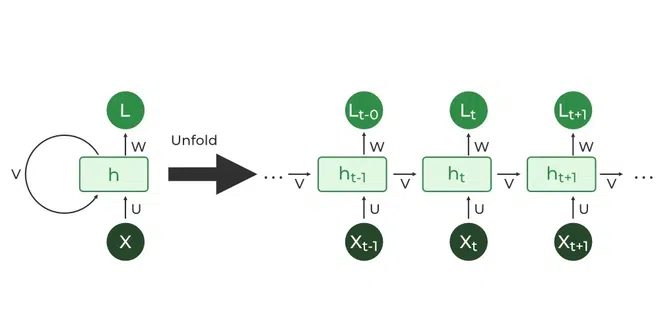

El problema de las RNN es que tienen problemas para recordar informaci√≥n a largo plazo. Esto se debe a que la informaci√≥n se va perdiendo a medida que se avanza en la red (Vanishing Gradient Problem).

In [45]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Cargar los datos y dividirlos en training y validation
Se cargan los datos preprocesados y se dividen en dos conjuntos: training y validation.

In [47]:
df = pd.read_csv('data/goemotions_clean.csv')
df.head()

text     emotion
0                            Shhh dont give idea       anger
1         Thank much kind stranger I really need   gratitude
2  Ion know would better buy trim make hard dose     neutral
3   Im honestly surprised We fallen much farther  excitement
4       Jurisprudence fetishist get technicality     neutral

In [48]:
# Dividir el dataset en train y validation
X_train, X_val, y_train, y_val = train_test_split(df['text'], df['emotion'], test_size=0.2, random_state=0)

## Preprocesamiento de los datos
Para poder utilizar los datos en la red neuronal, es necesario preprocesarlos. El texto debe ser convertido a n√∫meros, ya que las redes neuronales no pueden trabajar con texto. Para ello, se utiliza la clase Tokenizer de Keras, que convierte el texto a secuencias de n√∫meros. Adem√°s, se a√±ade padding a las secuencias para que todas tengan la misma longitud.

### Tokenizer

In [49]:
# Pasar texto a min√∫sculas
X_train = X_train.str.lower()
X_val = X_val.str.lower()

In [50]:
## Tokenizar el texto
max_words = 1000 # N√∫mero m√°ximo de palabras a considerar en el vocabulario (las m√°s frecuentes), el resto se consideran desconocidas

tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

In [51]:
# Vocabulario
word_index = tokenizer.word_index
print(f'Se encontraron {len(word_index)} tokens √∫nicos.')

Se encontraron 27545 tokens √∫nicos.


In [52]:
# Convertir los textos a secuencias de n√∫meros
train_sequences = tokenizer.texts_to_sequences(X_train)
val_sequences = tokenizer.texts_to_sequences(X_val)

In [53]:
# Convertir output a n√∫meros
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

### Padding

In [54]:
# Comprobar la longitud de las secuencias
max_seq_len = max([len(seq) for seq in train_sequences])
print(f'La secuencia m√°s larga tiene {max_seq_len} tokens.')

La secuencia m√°s larga tiene 18 tokens.


In [55]:
# Padding para que todas las secuencias tengan la misma longitud (agregar ceros al final de la secuencia para ajustarla al tama√±o m√°ximo)
X_train_padded = pad_sequences(train_sequences, maxlen=max_seq_len)
X_val_padded = pad_sequences(val_sequences, maxlen=max_seq_len)

In [56]:
# Muestra de algunas secuencias para comprobar que todas tienen la misma longitud
for seq in X_train_padded[:5]:
    print(seq)

[  0   0   0   0   0   0   0   0   0   0   0  29 655  19 140  46 409 256]
[  0   0   0   0   0   0   0 545 663  40  28 180 147 164  31 666 321 522]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  33 683]
[  0   0   0   0   0   0   0   0  49 632   1 807   2  59  35   2  88 960]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  17 120  58]


## Modelo de la red neuronal SimpleRNN
Se crea un modelo de red neuronal SimpleRNN con una capa de embedding, una capa de SimpleRNN y una capa densa de salida. Se compila el modelo y se entrena con los datos de training.

In [57]:
# N√∫mero de clases (emociones diferentes)
num_classes = len(df['emotion'].unique())
print(f'N√∫mero de clases (emociones): {num_classes}')

N√∫mero de clases (emociones): 23


In [58]:
# Definir el modelo
model = Sequential() # Inicializar el modelo
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_seq_len)) # Capa de Embedding
model.add(SimpleRNN(32)) # Capa SimpleRNN con 64 unidades (dimensiones)
model.add(Dense(num_classes, activation='softmax')) # Capa de salida con una neurona por cada clase y funci√≥n de activaci√≥n softmax para obtener probabilidades

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
# Entrena el modelo
batch_size = 128 # n√∫mero de muestras que se usar√°n en cada iteraci√≥n
epochs = 10 # n√∫mero de iteraciones completas al conjunto de datos de entrenamiento
history = model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val_padded, y_val))

Epoch 1/10
673/673 [==============================] - 6s 7ms/step - loss: 2.6632 - accuracy: 0.2830 - val_loss: 2.5227 - val_accuracy: 0.3039
Epoch 2/10
673/673 [==============================] - 5s 7ms/step - loss: 2.4592 - accuracy: 0.3136 - val_loss: 2.4315 - val_accuracy: 0.3180
Epoch 3/10
673/673 [==============================] - 5s 7ms/step - loss: 2.3800 - accuracy: 0.3251 - val_loss: 2.3917 - val_accuracy: 0.3252
Epoch 4/10
673/673 [==============================] - 5s 7ms/step - loss: 2.3357 - accuracy: 0.3310 - val_loss: 2.3819 - val_accuracy: 0.3280
Epoch 5/10
673/673 [==============================] - 5s 8ms/step - loss: 2.3088 - accuracy: 0.3337 - val_loss: 2.3684 - val_accuracy: 0.3283
Epoch 6/10
673/673 [==============================] - 5s 8ms/step - loss: 2.2901 - accuracy: 0.3354 - val_loss: 2.3721 - val_accuracy: 0.3238
Epoch 7/10
673/673 [==============================] - 5s 8ms/step - loss: 2.2749 - accuracy: 0.3374 - val_loss: 2.3746 - val_accuracy: 0.3219
Epoch 

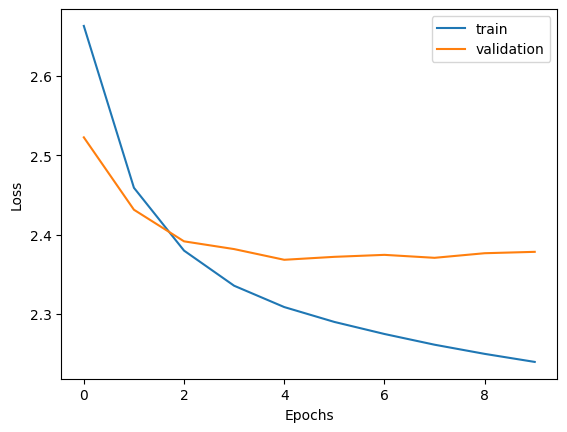

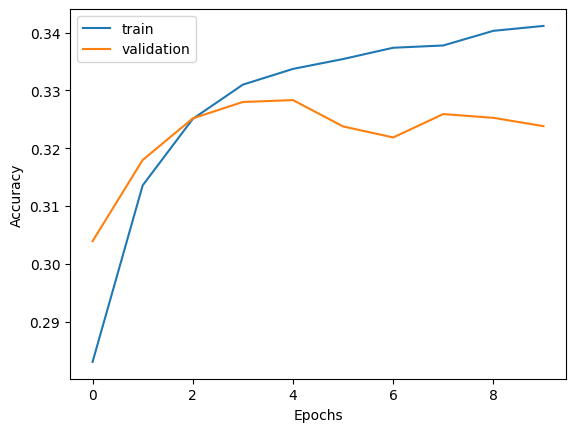

In [60]:
# Mostrar p√©rdida y precisi√≥n en el conjunto de entrenamiento y validaci√≥n
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Se obtiene una precisi√≥n en el conjunto de validaci√≥n del 32%.

### Predicciones

In [61]:
# Predecir las emociones en el conjunto de validaci√≥n
y_pred_probs = model.predict(X_val_padded)

# Obtener las etiquetas originales de las emociones
y_val_labels = label_encoder.inverse_transform(y_val)
emotion_labels = label_encoder.classes_

673/673 [==============================] - 3s 3ms/step


In [62]:
emotion_to_emoji = {
    'admiration': 'ü§©',
    'amusement': 'üòÑ',
    'anger': 'üò°',
    'annoyance': 'üòë',
    'approval': 'üëç',
    'caring': 'ü•∞',
    'confusion': 'üòï',
    'curiosity': 'ü§î',
    'desire': 'üòè',
    'disappointment': 'üòû',
    'disapproval': 'üëé',
    'disgust': 'ü§¢',
    'embarrassment': 'üò≥',
    'excitement': 'üòÉ',
    'fear': 'üò®',
    'gratitude': 'üôè',
    'joy': 'üòÄ',
    'love': '‚ù§Ô∏è',
    'neutral': 'üòê',
    'optimism': 'üòä',
    'realization': 'üò≤',
    'sadness': 'üò¢',
    'surprise': 'üòÆ'
}

In [70]:
# Dataframe con texto, emoci√≥n real y top 3 de emociones predichas con sus probabilidades
df_results = pd.DataFrame(columns=['text', 'top1', 'top2', 'top3'])
df_results['text'] = X_val

# Obtener las etiquetas de las emociones predichas
top1_labels = [emotion_labels[i] for i in y_pred_probs.argsort()[:, -1]]
top2_labels = [emotion_labels[i] for i in y_pred_probs.argsort()[:, -2]]
top3_labels = [emotion_labels[i] for i in y_pred_probs.argsort()[:, -3]]

# Mapear las emociones a emojis
top1_labels = [emotion_to_emoji[label] for label in top1_labels]
top2_labels = [emotion_to_emoji[label] for label in top2_labels]
top3_labels = [emotion_to_emoji[label] for label in top3_labels]

# Obtener las probabilidades de las emociones predichas
top1_probs = y_pred_probs.max(axis=1) * 100  # Multiplicar por 100 para obtener el porcentaje
top2_probs = y_pred_probs[np.arange(len(y_val)), y_pred_probs.argsort()[:, -2]] * 100
top3_probs = y_pred_probs[np.arange(len(y_val)), y_pred_probs.argsort()[:, -3]] * 100

# Asignar valores al DataFrame
df_results['top1'] = [f'{label} {prob:.0f}%' for label, prob in zip(top1_labels, top1_probs)]
df_results['top2'] = [f'{label} {prob:.0f}%' for label, prob in zip(top2_labels, top2_probs)]
df_results['top3'] = [f'{label} {prob:.0f}%' for label, prob in zip(top3_labels, top3_probs)]

# Resetear el √≠ndice
df_results.reset_index(drop=True, inplace=True)

df_results.head()


text    top1   top2   top3
0  maybe could put context wa responding someone ...   üòê 40%  üòï 13%   üò≤ 9%
1     name like picking choosing life work fact work   üòê 30%  ü§© 17%  üëç 11%
2              how people eat paper plate theyre bbq   üòê 33%  üò° 15%  ü§î 11%
3  thank voice reason people keep screaming vatic...   üôè 65%   üòÑ 8%   üòê 5%
4                         gotta love trailing minute  ‚ù§Ô∏è 55%  üòê 10%  ü§© 10%